<div style="text-align: center; background-color: skyblue; font-family: 'Times New Roman', serif; color: white; padding: 20px; font-size: 36px; font-weight: bold; border-radius: 15px; box-shadow: 0px 6px 15px rgba(0, 0, 0, 0.2); transition: all 0.3s ease;">
    INTRODUCTION TO DATA SCIENCE<br>
    @ FIT-HCMUS, VNU-HCM<br>
    FINAL PROJECT 🏫
</div>
<style>
    div:hover {
        transform: scale(1.05);
        box-shadow: 0px 10px 20px rgba(0, 0, 0, 0.3);
    }
</style>

<div style="text-align: center; background-color: #ADD8E6; font-family: 'Times New Roman', serif; color: white; padding: 20px; font-size: 30px; font-weight: bold; border-radius: 10px; box-shadow: 0px 6px 15px rgba(0, 0, 0, 0.2); transition: all 0.3s ease;">
    THE ANALYSIS OF THE MOBILE PHONE MARKET AT MOBILE CITY STORE
</div>
<style>
    div:hover {
        transform: scale(1.05);
        box-shadow: 0px 10px 20px rgba(0, 0, 0, 0.3);
    }
</style>


---

<div style="text-align: center; background-color: #ADD8E6; font-family: 'Times New Roman', serif; color: white; padding: 25px; font-size: 20px; font-weight: bold; border-radius: 10px; box-shadow: 0px 6px 15px rgba(0, 0, 0, 0.2); transition: all 0.3s ease;">
    DATA EXPLORATION
</div>
<style>
    div:hover {
        opacity: 0.8;
    }
</style>

**Người thực hiện**: Trương Tiến Anh

**MSSV**: 22120017


---

# Thư viện

In [92]:
# Import các thư viện cần thiết
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind

import ast

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Sử dụng data đã được xử lý

In [93]:
# Đọc file csv
data = pd.read_csv('../data/processed_data.csv', index_col=0)

# Chuyển đổi object thành list
data["do_phan_giai_cam_truoc"] = data["do_phan_giai_cam_truoc"].apply(ast.literal_eval)
data["do_phan_giai_cam_sau"] = data["do_phan_giai_cam_sau"].apply(ast.literal_eval)

data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8855 entries, 0 to 8854
Data columns (total 26 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ten                     8855 non-null   object 
 1   loai_dien_thoai         8855 non-null   object 
 2   thoi_gian_bao_hanh      8855 non-null   float64
 3   danh_gia                8855 non-null   float64
 4   so_luong_binh_luan      8855 non-null   int64  
 5   duong_dan               8855 non-null   object 
 6   mau_sac                 8576 non-null   object 
 7   gia_moi                 7347 non-null   float64
 8   gia_cu                  5158 non-null   float64
 9   he_dieu_hanh            8855 non-null   object 
 10  cpu                     8840 non-null   object 
 11  ram                     8838 non-null   float64
 12  bo_nho_trong            8536 non-null   float64
 13  dung_luong_pin          8655 non-null   float64
 14  thiet_ke                8739 non-null   

,ten,loai_dien_thoai,thoi_gian_bao_hanh,danh_gia,so_luong_binh_luan,duong_dan,mau_sac,gia_moi,gia_cu,he_dieu_hanh,cpu,ram,bo_nho_trong,dung_luong_pin,thiet_ke,hang_dien_thoai,la_dien_thoai_cu,kich_thuoc_man_hinh,tan_so_quet,do_sang_man_hinh,loai_man_hinh,so_the_sim,loai_pin,cong_suat_sac,do_phan_giai_cam_sau,do_phan_giai_cam_truoc
0,Điện thoại Xiaomi Redmi 12C (Helio G85),Redmi,12.0,5.0,7,https://mobilecity.vn/dien-thoai/xiaomi-redmi-...,Xanh Đậm,1650000.0,2950000.0,Android 12,Mediatek MT6769Z Helio G85 (12nm)\r\n8 nhân (2...,4.0,64.0,5000.0,Thanh + Cảm ứng,Xiaomi,False,6.71,NaN,500.0,LCD,2,Li-Po,10.0,"[50.0, 0.08]",[5.0]
1,Điện thoại Xiaomi Redmi 12C (Helio G85),Redmi,12.0,5.0,7,https://mobilecity.vn/dien-thoai/xiaomi-redmi-...,Xanh Đậm,1950000.0,2950000.0,Android 12,Mediatek MT6769Z Helio G85 (12nm)\r\n8 nhân (2...,4.0,128.0,5000.0,Thanh + Cảm ứng,Xiaomi,False,6.71,NaN,500.0,LCD,2,Li-Po,10.0,"[50.0, 0.08]",[5.0]
2,Điện thoại Xiaomi Redmi 12C (Helio G85),Redmi,12.0,5.0,7,https://mobilecity.vn/dien-thoai/xiaomi-redmi-...,Xanh bạc hà,1650000.0,2950000.0,Android 12,Mediatek MT6769Z Helio G85 (12nm)\r\n8 nhân (2...,4.0,64.0,5000.0,Thanh + Cảm ứng,Xiaomi,False,6.71,NaN,500.0,LCD,2,Li-Po,10.0,"[50.0, 0.08]",[5.0]
3,Điện thoại Xiaomi Redmi 12C (Helio G85),Redmi,12.0,5.0,7,https://mobilecity.vn/dien-thoai/xiaomi-redmi-...,Xanh bạc hà,1950000.0,2950000.0,Android 12,Mediatek MT6769Z Helio G85 (12nm)\r\n8 nhân (2...,4.0,128.0,5000.0,Thanh + Cảm ứng,Xiaomi,False,6.71,NaN,500.0,LCD,2,Li-Po,10.0,"[50.0, 0.08]",[5.0]
4,Điện thoại Xiaomi Redmi 12C (Helio G85),Redmi,12.0,5.0,7,https://mobilecity.vn/dien-thoai/xiaomi-redmi-...,Tím,1650000.0,2950000.0,Android 12,Mediatek MT6769Z Helio G85 (12nm)\r\n8 nhân (2...,4.0,64.0,5000.0,Thanh + Cảm ứng,Xiaomi,False,6.71,NaN,500.0,LCD,2,Li-Po,10.0,"[50.0, 0.08]",[5.0]


# Câu hỏi: Mức giá giảm có ảnh hưởng đến lượt đánh giá và mức độ hài lòng của khách hàng không?

## Mục đích
- Đánh giá tác động của giá cả đến hành vi tiêu dùng của khách hành để tìm ra những chiến thuật kinh doanh tốt nhất.
- Đưa ra các quyết định kinh doanh thông minh dựa trên dữ liệu đã được xử lý


## Tiền xử lý

In [94]:
df = data[["gia_cu", "gia_moi", "so_luong_binh_luan"]].copy().dropna()

# Tính toán mức giá giảm = Gía cũ - Gía mới
df['Mức giá giảm'] = df['gia_cu'] - df['gia_moi']
df['Có giảm giá'] = df['Mức giá giảm'] > 0

## Trực quan hóa

### Kiểm tra phân phối dữ liệu của mức giá giảm

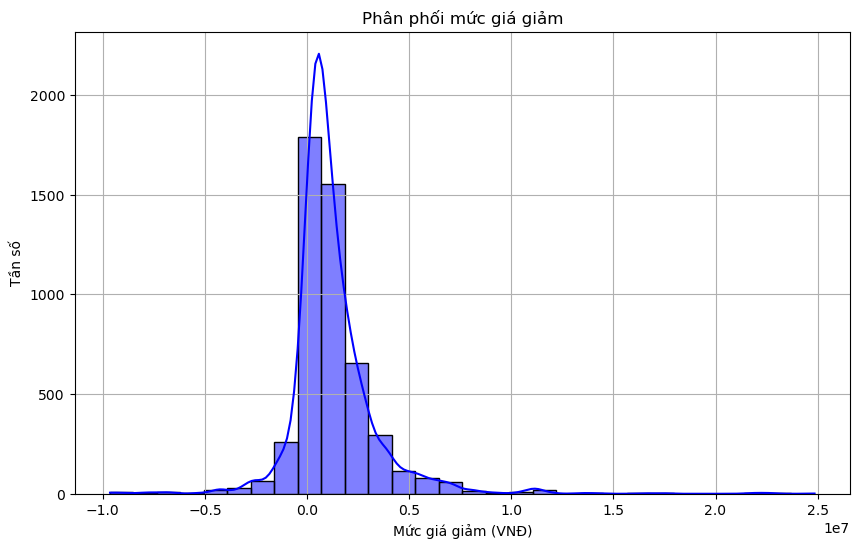

In [95]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Mức giá giảm'], kde=True, bins=30, color='blue')
plt.title("Phân phối mức giá giảm")
plt.xlabel("Mức giá giảm (VNĐ)")
plt.ylabel("Tần số")
plt.grid()
plt.show()

**Nhận xét chart**
- Biểu đồ histogram cho thấy `Mức giá giảm` chủ yếu tập trung gần giá trị 0, với 1 ít sản phẩm có mức giá giửm lớn hơn nhưng lại không đáng kể.
- Điều này cho thấy rằng hầu hết các sản phẩm không có mức giảm giá quá lớn

### Phân tích nhóm (Có giảm giá vss Không giảm giá)

In [101]:
group_means = df.groupby('Có giảm giá')['so_luong_binh_luan'].mean()

plt.figure(figsize=(10, 8))
sns.boxplot(x='Có giảm giá', y='so_luong_binh_luan', data=df, palette='Set2')
plt.title("Số lượt bình luận theo nhóm giảm giá")
plt.xlabel("Có giảm giá")
plt.ylabel("Số lượt bình luận")
plt.grid()
plt.show()

KeyError: 'Có giảm giá'

**Nhận xét chart**
- Biểu đồ trên ta có thể thấy không có sự khác biệt quá lớn giữa số lượt bình luật của 2 nhóm (có giảm giá và không giảm giá)
- Các giá trị ngoại lai (outliers) của nhóm không giảm giá có phạm vi phân bố rộng hơn 


### Hồi quy tuyến tính

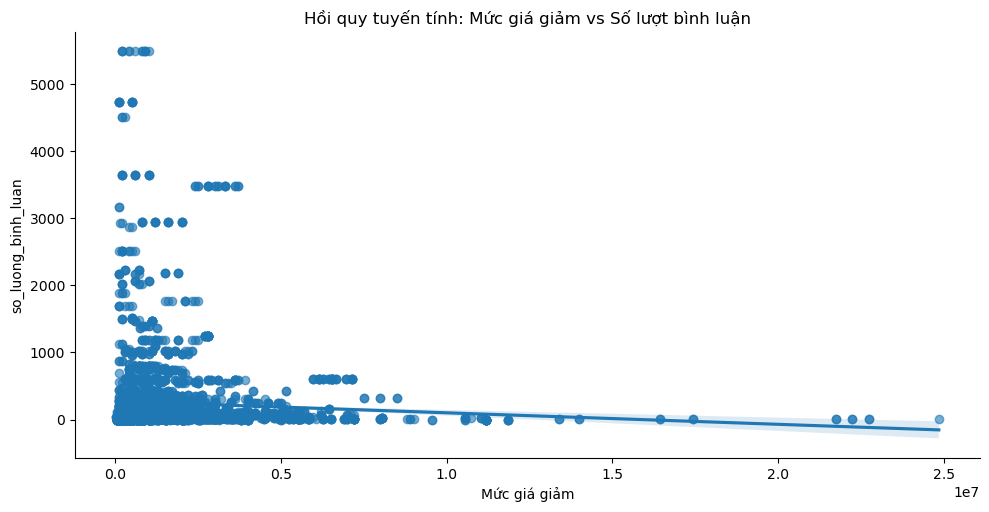

Hệ số tương quan: -0.06534300391735288


In [97]:
df_true = df[df['Mức giá giảm'] > 0] 
sns.lmplot(x='Mức giá giảm', y='so_luong_binh_luan', data=df_true, aspect=2, scatter_kws={'alpha': 0.6})
plt.title("Hồi quy tuyến tính: Mức giá giảm vs Số lượt bình luận")
plt.show()

#Hệ số tương quan
correlation = df['Mức giá giảm'].corr(df['so_luong_binh_luan'])
print(f'Hệ số tương quan: {correlation}')

**Nhận xét chart**
- Hệ số tương quan giữa `Mức giá giảm` và `Số lượt đánh giá` là -0.0063 rất gần với 0.
- Từ hệ số tương quan ta có thể kết luận là hầu như không có mối tương quan tuyến tính giữa 2 thuộc tính này. Có thể là do `Mức giá giảm` không phải là yếu tố then chốt ảnh hưởng đến `Số lượng đánh giá`
- Đường hồi quy gần như phẳng, thể hiện mối quan hệ yếu giữa 2 thuộc tính này hoặc không tồn tại
- Số lượt đánh giá (5000+) rải rác không đồng đều và có thể thấy nó khong phụ thuộc rõ ràng vào mức giá giảm

### Kết luận
- Không có sự khác biệt ý nghĩa về số lượt bình luận giữa các sản phẩm có giảm giá và không giảm giá.
- Mức giảm giá không phải là yếu tố chính tác động đến số lượt bình luận cũng như sự hài lòng cảu khác hàng

# Câu hỏi: Thời gian bảo hành có ảnh hưởng đến sự hài lòng của khách hàng không?

## Mục đích
- Để làm rõ xem mối liên quan giữa thời gian bảo hành và điểm đánh giá
- Tìm kiếm chiến lược kinh doanh thông minh giựa trên những đúc kết tính toán. Nếu thời gian bảo hành có tác động đến điểm đánh gái thì doanh nghiệp nên cân nhắc điều chỉnh chính sách bảo hành của mình để nâng cao sự hài lòng cũng như trung thành của khách hàng.

## Tiền xử lý

In [98]:
df = data[["thoi_gian_bao_hanh", "danh_gia"]].copy().dropna()

# Tính trung bình đánh giá theo 'Thời gian bảo hành (tháng)'
mean_satisfaction = df.groupby('thoi_gian_bao_hanh')['danh_gia'].mean()
mean_satisfaction


thoi_gian_bao_hanh
0.0     4.987673
1.0     4.975000
6.0     4.975118
12.0    4.986240
15.0    5.000000
18.0    4.977198
24.0    5.000000
30.0    4.957143
Name: danh_gia, dtype: float64

## Trực quan hóa

### Biểu đồ đường (Thời gian bảo hành vs. Sự hài lòng)

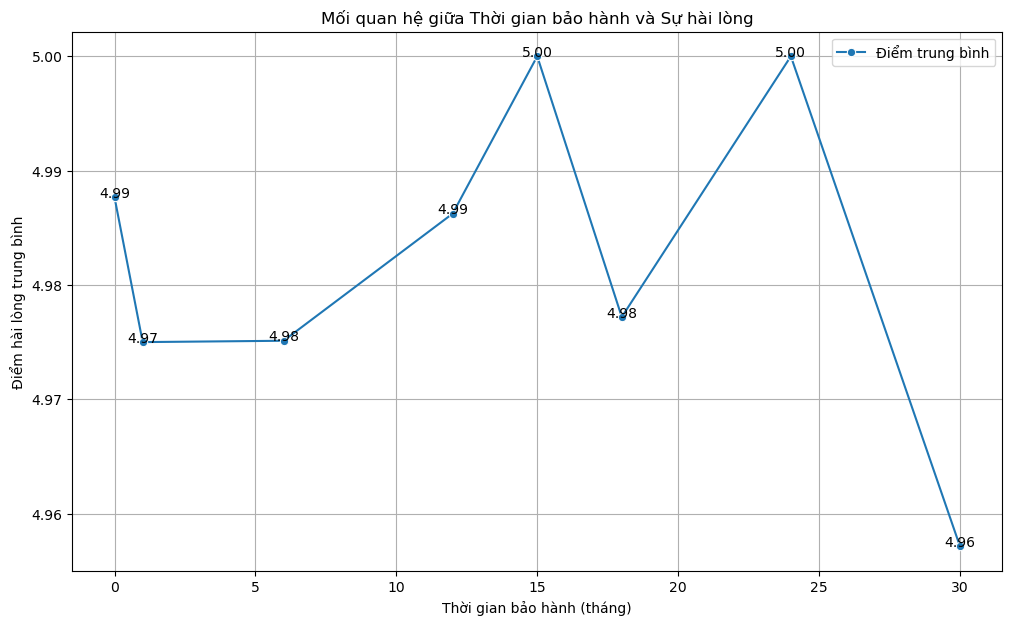

In [99]:
# Vẽ biểu đồ đường (line plot) để thay thế errorbar
plt.figure(figsize=(12, 7))
sns.lineplot(x=mean_satisfaction.index, y=mean_satisfaction.values, marker='o', label='Điểm trung bình')
plt.title('Mối quan hệ giữa Thời gian bảo hành và Sự hài lòng')
plt.xlabel('Thời gian bảo hành (tháng)')
plt.ylabel('Điểm hài lòng trung bình')
plt.grid()

# Hiển thị các giá trị cụ thể trên biểu đồ
for x, y in zip(mean_satisfaction.index, mean_satisfaction.values):
    plt.text(x, y, f'{y:.2f}', fontsize=10, ha='center', color='black')

plt.legend()
plt.show()


**Nhận xét chart**
- Biểu đồ trên ta thấy không có xu hưỡng rõ ràng giữa thời gian bảo hành và mức độ hài lòng
- Điểm trung bình dao động từ 4.96 đến 5.00, cho thấy sự khác biệt rất nhỏ giữa các mức thời gian bảo hành.
- Biểu đồ đường cho thấy các điểm hài lòng dao động nhẹ ở các mức thời gian bảo hành khác nhau không có xu hướng răng hay giảm rõ ràng. Có thể là do thời gian bảo hành không phải là yếu tổ then chốt đến điểm hài lòng của khác hàng

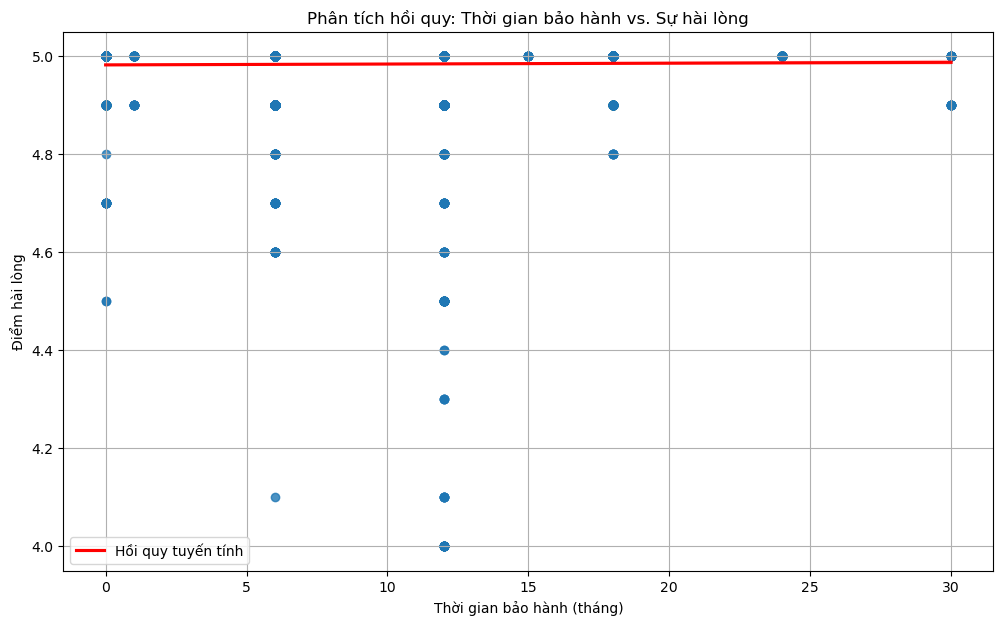

Hệ số tương quan: 0.011327893389531858


In [100]:
# Vẽ biểu đồ hồi quy
plt.figure(figsize=(12, 7))
sns.regplot(x='thoi_gian_bao_hanh', y='danh_gia', data=df, line_kws={'color': 'red', 'label': 'Hồi quy tuyến tính'})
plt.title('Phân tích hồi quy: Thời gian bảo hành vs. Sự hài lòng')
plt.xlabel('Thời gian bảo hành (tháng)')
plt.ylabel('Điểm hài lòng')
plt.legend()
plt.grid()
plt.show()

correlation = data['thoi_gian_bao_hanh'].corr(data['danh_gia'])
print(f'Hệ số tương quan: {correlation}')


**Nhận xét chart**
- Đường hồi quy gần như nằm ngang cho thấy thời gian bảo hành khoongc có liên hệ tuyến tính đnág kể so với sự hài lòng
- Các dữ liệu rải rác xung quanh mức đánh giá cao (gần 5), cho thấy sự ổn định của đánh giá khách hàng bất kể là thời gian bảo hành nào.
- Hệ số tương quan 0.011 rất gần 0. cũng cho thầy không có mối liện hệ giữa thời gian bảo hành và điểm đánh giá

### Kết luận
- Thời gian bảo hành không phải là yếu tố ảnh hưởng đáng kể đến sự hài lòng của khách hàng.
